In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

#os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")


In [2]:
from langchain_openai import ChatOpenAI

llm=ChatOpenAI(model="gpt-4o")


In [21]:
from langgraph.graph import MessagesState
from typing_extensions import TypedDict, List, Optional


class BlogState(TypedDict):
    keyword: str
    title: str
    blog_content: Optional[str]


In [22]:
from langchain_core.messages import HumanMessage, SystemMessage

def createTitle(state: BlogState):
    sys_msg_title = SystemMessage(content="You are a blog writer, Write a blog title based on the user input. Blog title should not be more than 60 characters - ")
    return {"title":[llm.invoke([sys_msg_title] + state["keyword"])]}

def createBlog(state: BlogState):
    sys_msg_blog = SystemMessage(content="You are a blog writer, Write a blog about 500 words based on the user input title -  ")
    return {"blog_content":[llm.invoke([sys_msg_blog] + state["title"])]}
    

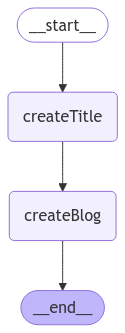

In [23]:
from langgraph.graph import START,END, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

builder=StateGraph(BlogState)

## Define the node
builder.add_node("createTitle",createTitle)
builder.add_node("createBlog",createBlog)

## Define the edges

builder.add_edge(START,"createTitle")
builder.add_edge("createTitle","createBlog")
builder.add_edge("createBlog", END)
graph=builder.compile()

# Show
display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
messages = [HumanMessage(content="Tajmahal")]
messages = graph.invoke({"keyword": messages})

In [27]:
for m in messages['title']:
    m.pretty_print()
for m in messages['blog_content']:
    m.pretty_print()

================================== Ai Message ==================================

"The Timeless Beauty and Mystique of the Taj Mahal"
================================== Ai Message ==================================

The Taj Mahal stands as an icon of love, an architectural marvel, and a testament to human creativity. Situated on the south bank of the Yamuna River in Agra, India, this magnificent white marble mausoleum continues to enchant millions of visitors from around the world. Built in the 17th century by the Mughal Emperor Shah Jahan, the Taj Mahal was a tribute to his beloved wife Mumtaz Mahal. Yet, beyond its romantic origins, the Taj Mahal embodies a fusion of cultures, stunning artistry, and enduring legacy, making it a timeless wonder that deserves renewed attention and admiration.

Upon entering the gardens that precede the Taj Mahal, visitors are captivated by the symmetry and meticulous design of the space. The gardens, split into four quadrants, symbolize paradise and ar